In [1]:
#Import all neseccarily libraries

import numpy as np
import networkx as netx #Graph library
import sys
import random
import time
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib 
np.set_printoptions(threshold = sys.maxsize)

from collections import deque

[(0, 6), (0, 4), (0, 3), (0, 9), (0, 5), (0, 7), (0, 8), (1, 8), (1, 2), (1, 5), (1, 6), (1, 3), (1, 7), (2, 3), (2, 9), (2, 6), (2, 8), (2, 5), (2, 7), (2, 4), (3, 4), (3, 7), (3, 9), (3, 5), (4, 7), (4, 5), (4, 9), (4, 6), (5, 6), (5, 7), (5, 8), (6, 7), (6, 9), (7, 8), (8, 9)]


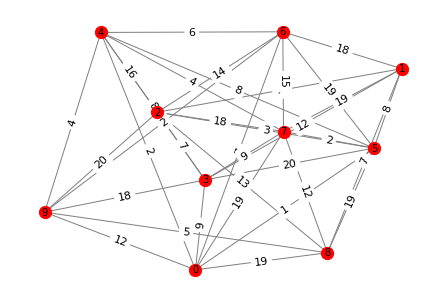

In [2]:
# Generate random weighted graph with N vertices and N+rnd edges
N = 10
rnd = 15
components = 0


while components != 1:
    rnd_seed = random.randint(0,100)
    Graph = netx.generators.random_graphs.gnm_random_graph(10, 35, seed=rnd_seed)
    components = netx.algorithms.components.number_connected_components(Graph)
    
for (u, v) in Graph.edges():
    Graph.edges[u,v]['weight'] = random.randint(1,20)
    
def draw_graph(G):
    pos = netx.spring_layout(Graph)
    netx.draw(Graph, pos, with_labels = True, node_size=150, node_color='Red',width=1, edge_color='Gray', font_size=10)   
    edge_labels = netx.get_edge_attributes(Graph, 'weight')
    netx.draw_networkx_edge_labels(Graph, pos, edge_labels = edge_labels, font_size = 11) 
    return pos

draw_graph(Graph)
print(Graph.edges())

In [3]:
def findRoot(par_node, i):
    if par_node[i] == i:
        return i
    return findRoot(par_node, par_node[i])


def Union(par_node, order, x, y):
    par_node_x = findRoot(par_node, x)
    par_node_y = findRoot(par_node, y)
    
    if order[par_node_x] < order[par_node_y]:
        par_node[par_node_x] = par_node_y
    elif order[par_node_x] > order[par_node_y]:
        par_node[par_node_y] = par_node_x
        
    else :
        par_node[par_node_y] = par_node_x
        order[par_node_x] += 1
        
def getMin(G, min_tree_list):
    min = float('inf') 
    
    for i in [(u, v, edges_w['weight']) for u, v, edges_w in G.edges( data = True) if 'weight' in edges_w ]:
        if min_tree_list[i] == False and i[2] < min:
            min = i[2]
            min_edge = i
            
    return min_edge


def kruskal_mst_edges(G, pos):
    Edges_num = len(G.edges()) 
    Vertex_num = len(G.nodes())
    mst = [] 
    min_tree_list = {} 
    
    for i in [ (u, v, edges_w['weight']) for u, v, edges_w in G.edges(data = True) if 'weight' in edges_w ]:
        min_tree_list[i] = False 

    par_node = [None] * Vertex_num 
    order = [None] * Vertex_num
    
    for v in range(Vertex_num):
        par_node[v] = v
        order[v] = 0
        
    while len(mst) < Vertex_num - 1 :
        curr_edge = getMin(G, min_tree_list) 
        min_tree_list[curr_edge] = True 
        y = findRoot(par_node, curr_edge[1])
        x = findRoot(par_node, curr_edge[0])
        
        if x != y:
            mst.append(curr_edge)
            Union(par_node, order, x, y)

    for X in mst:
        if (X[0], X[1]) in G.edges():
            netx.draw_networkx_edges(G, pos, edgelist = [(X[0], X[1])], width = 2.5, alpha = 0.6, edge_color = 'r')
    return mst

[(0, 5, 1), (0, 4, 2), (5, 7, 2), (6, 9, 2), (2, 5, 3), (4, 9, 4), (8, 9, 5), (1, 8, 7), (2, 3, 7)]


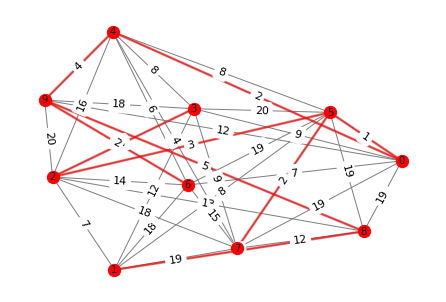

In [4]:
pos = draw_graph(Graph)
mst = kruskal_mst_edges(Graph, pos)
print(mst)
plt.show()

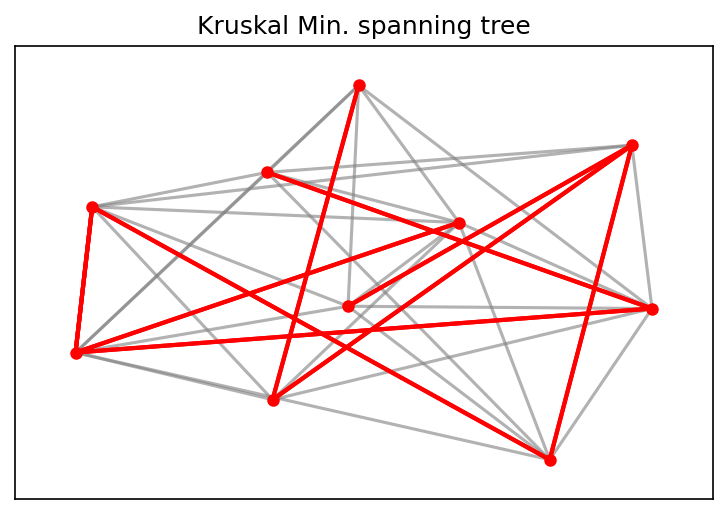

In [20]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

netx.draw_networkx_nodes(Graph, pos, node_size=25, ax=ax, node_color = 'r')
edge_labels = netx.get_edge_attributes(Graph, 'weight')
#netx.draw_networkx_edge_labels(Graph, pos, edge_labels = edge_labels, font_size = 8) 
netx.draw_networkx_edges(Graph, pos, width = 1.5, alpha = 0.6, edge_color = 'Gray', ax=ax)

ax.set_title('Kruskal min. spanning tree')

def animate(mst):

    for X in [mst]:
        if (X[0], X[1]) in Graph.edges():
            netx.draw_networkx_edges(Graph, pos, edgelist = [(X[0], X[1])], width = 2, alpha = 1, edge_color = 'r', ax=ax)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=mst)

f = r"C://Users/danil/Downloads/Algorithm-labs-main_1/Algorithm-labs-main (1)/Algorithm-labs-main/animation.gif" 
writergif =  matplotlib.animation.PillowWriter(fps=5) 
ani.save(f, writer=writergif)

ani

In [21]:
def findMin(dist, min_tree_list, V):
    min = float('inf') 
    for v in range(V):
        if min_tree_list[v] == False and dist[v] < min:
            min = dist[v]
            min_index = v
    return min_index

def prim_mst_edges(G, pos):
    V = len(G.nodes()) 
    dist = [] 
    par_node = [None]*V 
    min_tree_list = []
    mst = [] 
    
    for i in range(V):
        dist.append(sys.maxsize)
        min_tree_list.append(False)
    dist[0] = 0
    par_node[0]= -1 
    
    for count in range(V - 1):
        u = findMin(dist, min_tree_list, V) 
        min_tree_list[u] = True
        
        for v in range(V):
            if (u, v) in G.edges():
                if min_tree_list[v] == False and G[u][v]['weight'] < dist[v]:
                    dist[v] = G[u][v]['weight']
                    par_node[v] = u
                    
    for X in range(V):
        if par_node[X] != -1: 
            if (par_node[X], X) in G.edges():
                mst.append((par_node[X], X))
                netx.draw_networkx_edges(G, pos, edgelist = [(par_node[X], X)], width = 2.5, alpha = 0.6, edge_color = 'r')
    return mst


[(2, 1), (5, 2), (2, 3), (0, 4), (0, 5), (9, 6), (5, 7), (9, 8), (4, 9)]


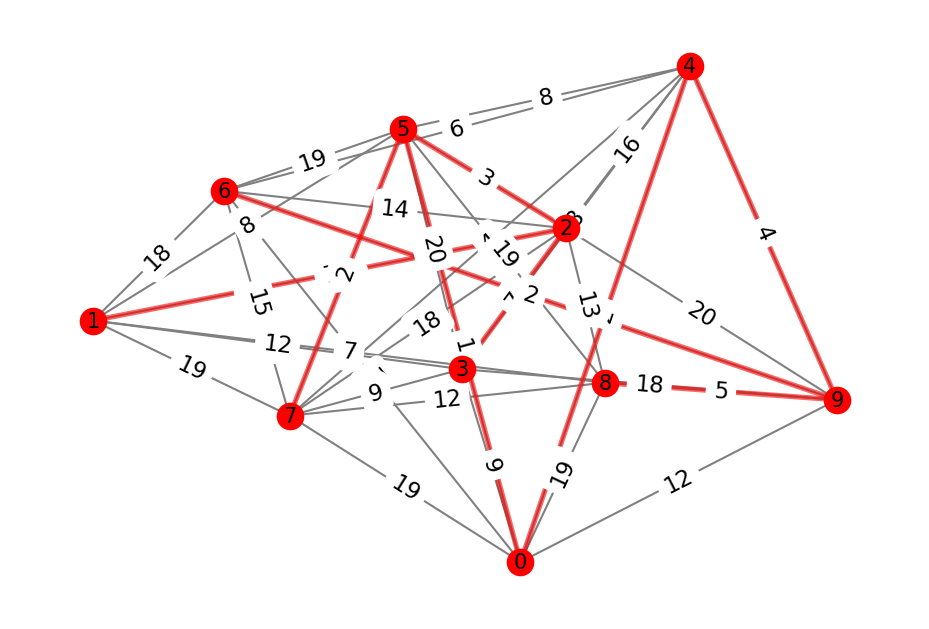

In [22]:
pos = draw_graph(Graph)
mst_prim = prim_mst_edges(Graph, pos)
print(mst_prim)
plt.show()

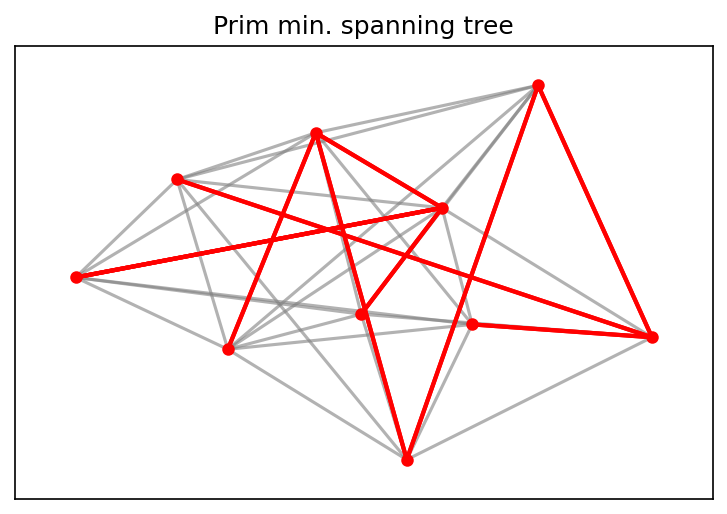

In [23]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

netx.draw_networkx_nodes(Graph, pos, node_size=25, ax=ax, node_color = 'r')
edge_labels = netx.get_edge_attributes(Graph, 'weight')
#netx.draw_networkx_edge_labels(Graph, pos, edge_labels = edge_labels, font_size = 8) 
netx.draw_networkx_edges(Graph, pos, width = 1.5, alpha = 0.6, edge_color = 'Gray', ax=ax)
ax.set_title('Prim min. spanning tree')

def animate(mst):

    for X in [mst]:
        if (X[0], X[1]) in Graph.edges():
            netx.draw_networkx_edges(Graph, pos, edgelist = [(X[0], X[1])], width = 2, alpha = 1, edge_color = 'r', ax=ax)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=mst_prim)

f = r"C://Users/danil/Downloads/Algorithm-labs-main_1/Algorithm-labs-main (1)/Algorithm-labs-main/animation2.gif" 
writergif =  matplotlib.animation.PillowWriter(fps=5) 
ani.save(f, writer=writergif)

ani